# Objection detection model

In [1]:
%reset -f

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.chdir(r"/content/gdrive/MyDrive/YOLO_visualbot/")

In [4]:
!pip install -q -r "./requirements.txt"

     |████████████████████████████████| 645kB 7.6MB/s 


In [5]:
!python -m pip install -q torch==1.7.0+cu110 torchvision==0.8.1+cu110 torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

     |███████████████████████▌        | 834.1MB 1.3MB/s eta 0:04:00tcmalloc: large alloc 1147494400 bytes == 0x561c48e8e000 @  0x7f9bcaf24615 0x561c1032506c 0x561c10404eba 0x561c10327e8d 0x561c1041999d 0x561c1039bfe9 0x561c10396b0e 0x561c1032977a 0x561c1039be50 0x561c10396b0e 0x561c1032977a 0x561c1039886a 0x561c1041a7c6 0x561c10397ee2 0x561c1041a7c6 0x561c10397ee2 0x561c1041a7c6 0x561c10397ee2 0x561c1041a7c6 0x561c1049c431 0x561c103fd049 0x561c10367c84 0x561c103288e9 0x561c1039cade 0x561c1032969a 0x561c10397a45 0x561c10396e0d 0x561c1032977a 0x561c10397a45 0x561c1032969a 0x561c10397a45
     |█████████████████████████████▊  | 1055.7MB 1.3MB/s eta 0:01:03tcmalloc: large alloc 1434370048 bytes == 0x561c8d4e4000 @  0x7f9bcaf24615 0x561c1032506c 0x561c10404eba 0x561c10327e8d 0x561c1041999d 0x561c1039bfe9 0x561c10396b0e 0x561c1032977a 0x561c1039be50 0x561c10396b0e 0x561c1032977a 0x561c1039886a 0x561c1041a7c6 0x561c10397ee2 0x561c1041a7c6 0x561c10397ee2 0x561c1041a7c6 0x561c10397ee2 0x561c1041

In [ ]:
os.chdir(r"/content/gdrive/MyDrive/YOLO_visualbot/")

In [ ]:
!python train.py --batch 10 --epochs 100 --data trainerMetadata.yaml --cfg ./models/yolov5s.yaml --name visualbot

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(batch_size=10, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='VB.yaml', device='', epochs=100, evolve=False, hyp='', img_size=[800, 600], multi_scale=False, name='visualbot', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CPU

2021-03-17 04:45:43.986157: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Hyperparameters {'optimizer': 'SGD', 'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Overriding ./models/yolov5s.yaml nc=80 with nc=8


In [5]:
%load_ext tensorboard
%tensorboard --logdir=runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "runpy.py", line 192, in _run_module_as_main
  File "runpy.py", line 85, in _run_code
  File "D:\2020-21\ComputerVision\python38_VB\Scripts\tensorboard.exe\__main__.py", line 4, in <module>
  File "d:\2020-21\computervision\python38_vb\lib\site-packages\tensorboard\main.py", line 43, in <module>
    from tensorboard import default
  File "d:\2020-21\computervision\python38_vb\lib\site-packages\tensorboard\default.py", line 36, in <module>
    from tensorboard.plugins.audio import audio_plugin
  File "d:\2020-21\computervision\python38_vb\lib\site-packages\tensorboard\plugins\audio\audio_plugin.py", line 25, in <module>
    from tensorboard import plugin_util
  File "d:\2020-21\computervision\python38_vb\lib\site-packages\tensorboard\plugin_util.py", line 27, in <module>
    import markdown
  File "d:\2020-21\computervision\python38_vb\lib\site-packages\markdown\__init__.py

In [ ]:
!python detect.py --source ./inference/images/ --weights runs/exp5_Frontpanel/weights/best_powercable.pt --conf 0.15

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.15, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='./inference/images/', update=False, view_img=False, weights=['runs/exp3_powercable/weights/best_powercable.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Fusing layers... Model Summary: 140 layers, 7.24652e+06 parameters, 6.61683e+06 gradients
image 1/3 /content/gdrive/My Drive/yolov5/inference/images/14.jpg: 512x640 1 Power cables, Done. (0.024s)
image 2/3 /content/gdrive/My Drive/yolov5/inference/images/142.jpg: 512x640 1 Power cables, Done. (0.020s)
image 3/3 /content/gdrive/My Drive/yolov5/inference/images/PowerCable_67.jpg: 512x640 1 Power cables, Done. (0.020s)
Results saved to /content/gdrive/My Drive/yolov5/inference/output
Done. (0.390s)


In [ ]:
# C:/ProgramData/Anaconda3/envs/Pytorch_vb/python.exe detect.py --source ./inference/images/ --weights runs/exp2_router/weights/best_router.pt --conf 0.3 --img 800

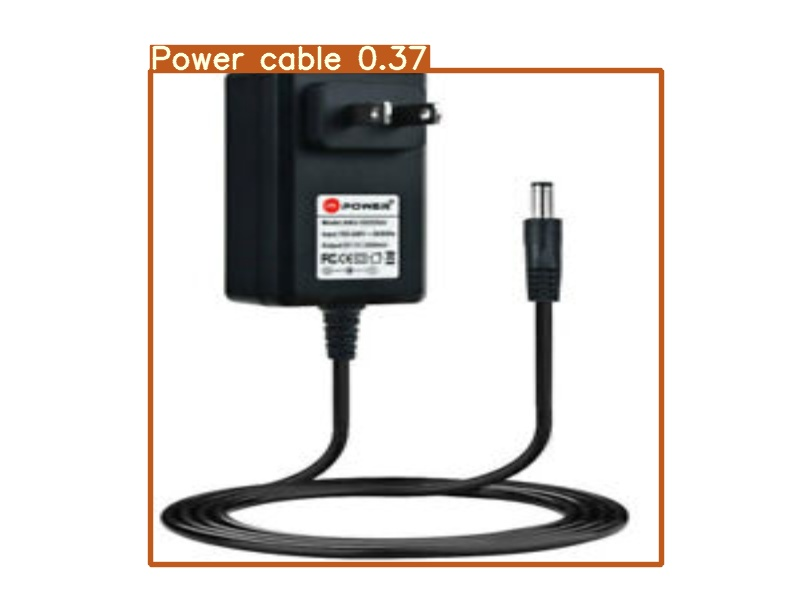

In [ ]:
from IPython.display import Image
Image(filename='inference/output/142.jpg', width=600)